**Steps :**
=

**Import Relevent Libraries/Modules**
-

**Basic EDA**
  - Missing Data
  - Duplicate Data
  - Outliers and Anonalies
  - Data Visualization
  - Feature Encoding
  - Feature Selection


**Model Building**
  - Seperate your Independent and Dependent
  - Split your Data into Train and Test
  - Model Selection
  - Model Traning
  - Model Evalution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor



**Load the Data Set**
-

In [2]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Basic EDA 
-

In [13]:
df.shape


(5000, 7)

In [15]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [18]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [19]:
df[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [20]:
df.nunique()

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [25]:
df['Avg. Area Number of Bedrooms'].value_counts()

Avg. Area Number of Bedrooms
4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02     6
5.42     6
6.42     5
Name: count, Length: 255, dtype: int64

Missing Data
-

In [28]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [29]:
skew = df['Avg. Area Income'].skew()
skew

-0.03371997540427538

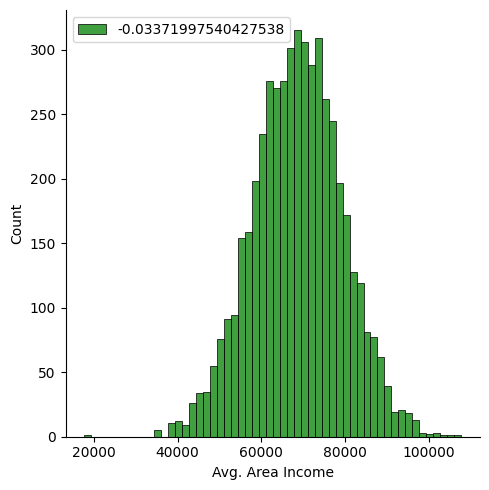

In [32]:
sns.displot(df['Avg. Area Income'], color='g' , label = skew)
plt.legend()
plt.show()

In [35]:
df['Avg. Area Income'].mean()

68583.10898395974

In [36]:
df['Avg. Area Income'].median()

68804.28640371616

In [38]:
#to fill missing data [normal distribution]
df['Avg. Area Income'].fillna(df['Avg. Area Income'].mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_7044\1180369049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Avg. Area Income'].fillna(df['Avg. Area Income'].mean(), inplace=True)


Duplicate Data
-

In [8]:
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool>

In [9]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [ ]:
df.drop_duplicates(keep='first', inplace=True

Outliers or Anomalies
-

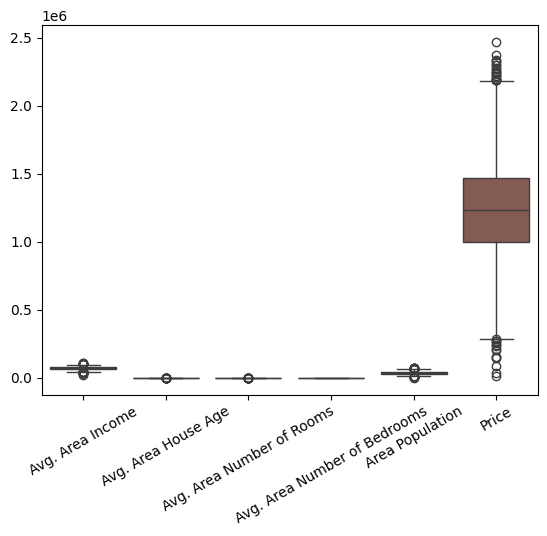

In [12]:
sns.boxplot(df)
plt.xticks(rotation=30)
plt.show()

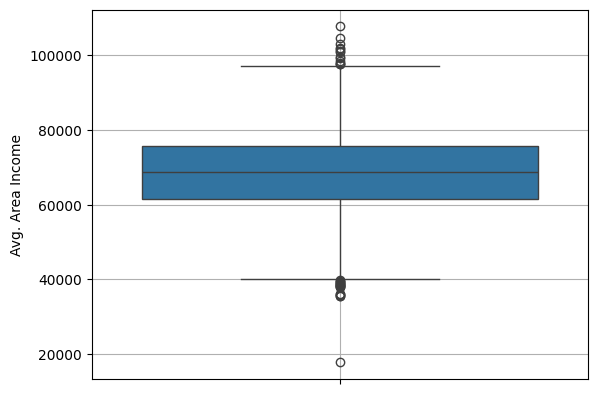

In [15]:
sns.boxplot(df['Avg. Area Income'])
plt.grid()

In [18]:
df[df['Avg. Area Income' ] > 97000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1734,104702.724257,5.575523,6.932106,3.22,22560.527135,1.742432e+06,"14230 Douglas River Suite 570\nConniechester, ..."
1891,101144.323930,6.350845,7.231771,3.09,35772.524007,2.007556e+06,"233 Wilson Ranch Suite 086\nWest Christine, IN..."
2300,98468.253641,7.035383,6.629233,3.05,50676.312404,2.275455e+06,USNV Hoffman\nFPO AA 45311-5701
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06,"52280 Steven Street\nRobertchester, IA 40405-0504"
3483,97881.587279,5.034395,7.575905,5.46,37152.799341,1.859161e+06,"01230 Peter Loop Suite 135\nEdwardstad, SC 67538"


In [20]:
len(df[df['Avg. Area Income' ] > 97000])

15

In [21]:
len(df[df['Avg. Area Income' ] < 40000])

19

In [22]:
df[df['Avg. Area Income' ] < 40000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"
1459,35963.330809,3.438547,8.264122,3.28,24435.777302,1.430274e+05,"166 Terry Grove\nSouth Michaelhaven, PR 18054"
1597,39294.036523,5.928585,5.960676,4.36,43183.516104,7.811375e+05,"829 Bonnie Rue Suite 653\nYorkville, MP 35797-..."
2025,38139.919045,5.577267,6.348068,2.13,45899.738402,7.237501e+05,"2899 Katherine Junction\nNorth Richardview, SC..."
2092,35608.986237,6.935839,7.827589,6.35,20833.007623,4.493316e+05,"652 Stanton Island\nAdamsview, VA 56957-9960"
2242,38868.250311,6.965104,8.966906,4.22,25432.076773,7.590447e+05,"86840 Jonathon Field\nStevenport, KY 45694-2395"


In [23]:
len(df[(df['Avg. Area Income'] > 95000) | (df['Avg. Area Income'] < 40000)])

50

In [24]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"


In [25]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)].index

Index([  12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],
      dtype='int64')

In [26]:
df.shape

(5000, 7)

In [27]:
df.drop(index= [12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855], axis=0, inplace=True)

In [28]:
df.shape

(4966, 7)

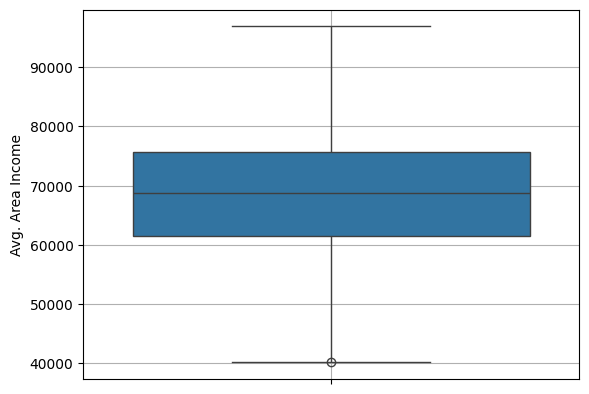

In [33]:
sns.boxplot(df['Avg. Area Income'])
plt.grid()

In [35]:
df[(df['Avg. Area Income'] > 97000) | (df['Avg. Area Income'] < 40000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


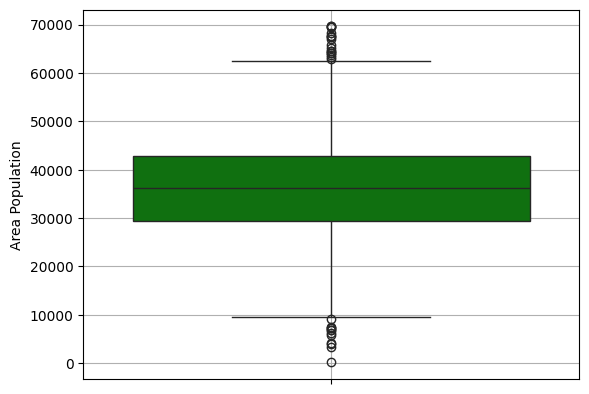

In [38]:
sns.boxplot(df['Area Population'], color= 'g')
plt.grid()

Feature Encoding
-

In [41]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [43]:
df['Address']

0       208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1       188 Johnson Views Suite 079\nLake Kathleen, CA...
2       9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                               USS Barnett\nFPO AP 44820
4                              USNS Raymond\nFPO AE 09386
                              ...                        
4995                     USNS Williams\nFPO AP 30153-7653
4996                PSC 9258, Box 8489\nAPO AA 42991-3352
4997    4215 Tracy Garden Suite 076\nJoshualand, VA 01...
4998                            USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 2...
Name: Address, Length: 4966, dtype: object

In [44]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
PSC 7034, Box 6131\nAPO AA 05662-4293                            1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 4966, dtype: int64

In [45]:
df.shape

(4966, 7)

In [50]:
df.drop(columns=['Address'], axis=1 , inplace=True)

In [51]:
df.shape

(4966, 6)

In [52]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Feature Selection - Correlation Matrix
-

In [53]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006274,-0.012836,0.018610,-0.011947,0.629465
Avg. Area House Age,-0.006274,1.000000,-0.008912,0.005030,-0.018811,0.455607
Avg. Area Number of Rooms,-0.012836,-0.008912,1.000000,0.463133,0.004193,0.340249
Avg. Area Number of Bedrooms,0.018610,0.005030,0.463133,1.000000,-0.021517,0.171979
Area Population,-0.011947,-0.018811,0.004193,-0.021517,1.000000,0.414990
Price,0.629465,0.455607,0.340249,0.171979,0.414990,1.000000


<Axes: >

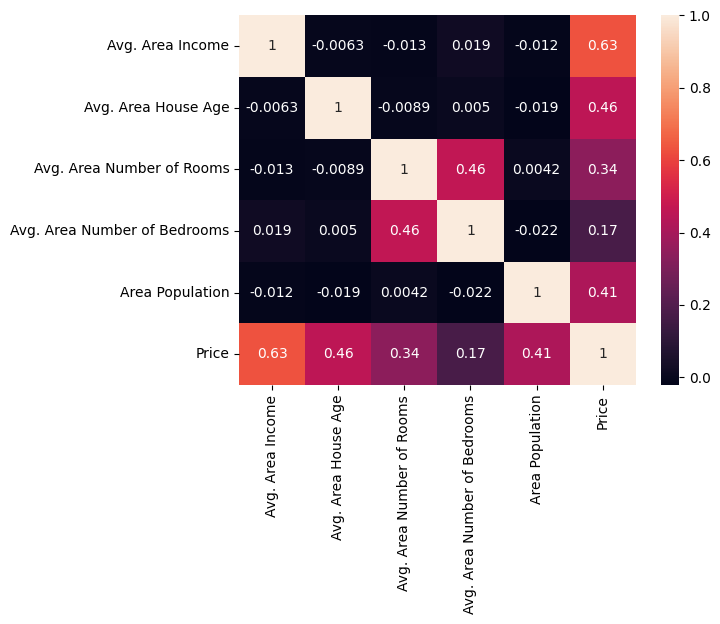

In [54]:
sns.heatmap(df.corr(), annot=True)

In [55]:
df.corr()['Price']

Avg. Area Income                0.629465
Avg. Area House Age             0.455607
Avg. Area Number of Rooms       0.340249
Avg. Area Number of Bedrooms    0.171979
Area Population                 0.414990
Price                           1.000000
Name: Price, dtype: float64

Model Building using Regression algorithms
-

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Seperate your independent and dependent
-

In [60]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [8]:
x = df.iloc[:, :-1]
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [10]:
y = df.loc[:, 'Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


Split your data into Train and Test
-

In [11]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4227,66547.016454,5.846095,6.847298,4.13,27850.822901,1.094880e+06
4676,53722.008599,6.401391,7.787764,3.30,47649.224665,1.300389e+06
800,64838.492899,6.437157,8.699544,4.02,32921.010068,1.382172e+06
3671,67097.092120,6.086754,7.211963,3.05,27191.506877,1.027428e+06
4193,75245.465436,8.167820,7.420100,3.42,37410.669928,1.562887e+06
...,...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445,1.023944e+06
466,56685.014442,6.958045,7.502115,3.38,43322.166854,1.223101e+06
3092,66195.337714,6.507971,6.611861,3.14,37288.923574,1.318598e+06
3772,58694.515017,7.394768,9.269453,4.32,49960.977236,1.708631e+06


In [14]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1501,61907.593345,7.017838,6.440256,3.25,43828.947207,1.339096e+06
2586,57160.202243,6.893260,6.921532,3.13,43467.147035,1.251794e+06
2653,70190.796445,6.745054,6.662567,2.01,29215.136112,1.340095e+06
1055,69316.796889,6.300409,7.873576,4.28,24448.211461,1.431508e+06
705,72991.481649,3.412866,6.494081,2.48,50626.495426,1.042374e+06
...,...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072,1.107031e+06
2313,75967.135085,5.939370,6.111658,2.32,38897.091584,1.405505e+06
3214,81013.615294,7.149797,7.239105,5.44,45472.049451,1.924156e+06
2732,86762.882864,6.530193,5.106962,2.09,47724.581355,1.571254e+06


Model Building
-

In [15]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Model Prediction
-

In [18]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [19]:
x_train[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4227,66547.016454,5.846095,6.847298,4.13,27850.822901,1.094880e+06
4676,53722.008599,6.401391,7.787764,3.30,47649.224665,1.300389e+06
800,64838.492899,6.437157,8.699544,4.02,32921.010068,1.382172e+06


In [21]:
x_test[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1501,61907.593345,7.017838,6.440256,3.25,43828.947207,1.339096e+06
2586,57160.202243,6.893260,6.921532,3.13,43467.147035,1.251794e+06
2653,70190.796445,6.745054,6.662567,2.01,29215.136112,1.340095e+06


In [22]:
y_train[:3]

4227    1.094880e+06
4676    1.300389e+06
800     1.382172e+06
Name: Price, dtype: float64

In [23]:
y_test[:3]

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
Name: Price, dtype: float64

In [27]:
y_pred_train[:3] 

array([1094879.77349138, 1300389.35082021, 1382172.29370661])

In [25]:
x_test[:3]#X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1501,61907.593345,7.017838,6.440256,3.25,43828.947207,1.339096e+06
2586,57160.202243,6.893260,6.921532,3.13,43467.147035,1.251794e+06
2653,70190.796445,6.745054,6.662567,2.01,29215.136112,1.340095e+06


In [28]:
y_test[:3]

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
Name: Price, dtype: float64

Model Evalution (MSE, MAE, R2-Score)
-

**For traning data**

- Y - y_train
- Y^ - y_pred_train

In [37]:
#MSE
mean_squared_error(y_train, y_pred_train)

1.4611980911807335e-20

In [38]:
#MAE
mean_absolute_error(y_train, y_pred_train)

6.893924364703707e-11

In [33]:
#R2_score
r2_score(y_train, y_pred_train)

1.0

**For traning data**

- Y - y_train
- Y^ - y_pred_train

In [34]:
#MSE
mean_squared_error(y_test, y_pred_test)

1.4513062518255182e-20

In [35]:
#MAE
mean_absolute_error(y_test, y_pred_test)

6.996560841798782e-11

In [36]:
#R2_score
r2_score(y_test, y_pred_test)

1.0